# Previs√£o de Pre√ßos de Casas com Machine Learning 

## Contexto

O mercado imobili√°rio √© din√¢mico e multifacetado ‚Äî o valor de uma casa n√£o depende apenas de seu tamanho ou localiza√ß√£o, mas tamb√©m de fatores como qualidade da constru√ß√£o, idade do im√≥vel, presen√ßa de garagem, tipo de acabamento, entre outros. 

Neste projeto, trabalhamos com um conjunto de dados detalhado sobre resid√™ncias em Ames, Iowa, contendo 79 vari√°veis explicativas que descrevem caracter√≠sticas f√≠sicas, estruturais e geogr√°ficas dos im√≥veis. Com base nessas informa√ß√µes, nosso objetivo √© construir modelos de aprendizado de m√°quina capazes de prever com precis√£o o pre√ßo de venda de uma casa.

## Objetivo

Mais do que apenas treinar algoritmos, este projeto busca gerar **valor pr√°tico**:

- Para **compradores e vendedores**, ele pode ajudar a estimar o valor justo de um im√≥vel, com base em suas caracter√≠sticas, evitando decis√µes impulsivas ou preju√≠zos financeiros.  
- Para **corretores, investidores ou empresas do setor imobili√°rio**, ele pode oferecer uma ferramenta estrat√©gica para avalia√ß√£o de portf√≥lios, defini√ß√£o de pre√ßos e identifica√ß√£o de oportunidades de mercado.  
- Para **profissionais de dados**, √© uma oportunidade de aplicar t√©cnicas robustas de pr√©-processamento, modelagem e valida√ß√£o cruzada em um problema realista e desafiador.

Ao final do projeto, n√£o apenas saberemos qual modelo melhor prev√™ os pre√ßos, mas tamb√©m entenderemos **quais fatores realmente influenciam o valor de uma casa** e como esses insights podem ser usados para tomadas de decis√£o mais inteligentes no setor imobili√°rio.

Vamos em frente!

In [226]:
# Bibliotecas principais
import pandas as pd
import numpy as np

# Visualiza√ß√£o
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pr√©-processamento e Modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [227]:
# Carregando os dados
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [269]:
# Dicion√°rio de tradu√ß√£o para portugu√™s
colunas_pt = {
    'Id': 'Id',
    'MSSubClass': 'Classe_MS',
    'MSZoning': 'Zona_MS',
    'LotFrontage': 'Frente_Lote',
    'LotArea': 'Area_Lote',
    'Street': 'Rua',
    'Alley': 'Beco',
    'LotShape': 'Forma_Lote',
    'LandContour': 'Contorno_Terreno',
    'Utilities': 'Servicos_Publicos',
    'LotConfig': 'Config_Lote',
    'LandSlope': 'Inclina√ß√£o_Terreno',
    'Neighborhood': 'Bairro',
    'Condition1': 'Condicao1',
    'Condition2': 'Condicao2',
    'BldgType': 'Tipo_Construcao',
    'HouseStyle': 'Estilo_Casa',
    'OverallQual': 'Qualidade_Geral',
    'OverallCond': 'Condicao_Geral',
    'YearBuilt': 'Ano_Construcao',
    'YearRemodAdd': 'Ano_Reforma',
    'RoofStyle': 'Estilo_Telhado',
    'RoofMatl': 'Material_Telhado',
    'Exterior1st': 'Exterior1',
    'Exterior2nd': 'Exterior2',
    'MasVnrType': 'Tipo_Veneer',
    'MasVnrArea': 'Area_Veneer',
    'ExterQual': 'Qualidade_Exterior',
    'ExterCond': 'Condicao_Exterior',
    'Foundation': 'Fundacao',
    'BsmtQual': 'Qualidade_Por√£o',
    'BsmtCond': 'Condicao_Por√£o',
    'BsmtExposure': 'Exposicao_Por√£o',
    'BsmtFinType1': 'TipoAcab_Por√£o1',
    'BsmtFinSF1': 'AreaAcab_Por√£o1',
    'BsmtFinType2': 'TipoAcab_Por√£o2',
    'BsmtFinSF2': 'AreaAcab_Por√£o2',
    'BsmtUnfSF': 'AreaNaoAcab_Por√£o',
    'TotalBsmtSF': 'AreaTotal_Por√£o',
    'Heating': 'Aquecimento',
    'HeatingQC': 'Qualidade_Aquecimento',
    'CentralAir': 'ArCentral',
    'Electrical': 'Eletrico',
    '1stFlrSF': 'Area1Andar',
    '2ndFlrSF': 'Area2Andar',
    'LowQualFinSF': 'AreaBaixaQualidade',
    'GrLivArea': 'AreaHab',
    'BsmtFullBath': 'BanheiroCompleto_Por√£o',
    'BsmtHalfBath': 'Lavabo_Por√£o',
    'FullBath': 'BanheiroCompleto',
    'HalfBath': 'Lavabo',
    'BedroomAbvGr': 'QuartosAcimaSolo',
    'KitchenAbvGr': 'CozinhasAcimaSolo',
    'KitchenQual': 'Qualidade_Cozinha',
    'TotRmsAbvGrd': 'TotalComodos_AcimaSolo',
    'Functional': 'Funcionalidade',
    'Fireplaces': 'Lareiras',
    'FireplaceQu': 'Qualidade_Lareira',
    'GarageType': 'Tipo_Garagem',
    'GarageYrBlt': 'AnoConstrucao_Garagem',
    'GarageFinish': 'Acabamento_Garagem',
    'GarageCars': 'CapacidadeCarros_Garagem',
    'GarageArea': 'Area_Garagem',
    'GarageQual': 'Qualidade_Garagem',
    'GarageCond': 'Condicao_Garagem',
    'PavedDrive': 'EntradaPavimentada',
    'WoodDeckSF': 'AreaDeckMadeira',
    'OpenPorchSF': 'AreaVarandaAberta',
    'EnclosedPorch': 'AreaVarandaFechada',
    '3SsnPorch': 'AreaVaranda3Estacoes',
    'ScreenPorch': 'AreaVarandaTela',
    'PoolArea': 'AreaPiscina',
    'PoolQC': 'Qualidade_Piscina',
    'Fence': 'Cerca',
    'MiscFeature': 'CaracteristicaExtra',
    'MiscVal': 'ValorExtra',
    'MoSold': 'MesVenda',
    'YrSold': 'AnoVenda',
    'SaleType': 'TipoVenda',
    'SaleCondition': 'CondicaoVenda'
}

# Renomear colunas no DataFrame
train.rename(columns=colunas_pt, inplace=True)
test.rename(columns=colunas_pt, inplace=True)


In [271]:
# Visualizando as primeiras linhas dos dados de treinanto 
train.head()

Id  Classe_MS Zona_MS  Frente_Lote  Area_Lote   Rua Forma_Lote  \
0   1         60      RL         65.0       8450  Pave        Reg   
1   2         20      RL         80.0       9600  Pave        Reg   
2   3         60      RL         68.0      11250  Pave        IR1   
3   4         70      RL         60.0       9550  Pave        IR1   
4   5         60      RL         84.0      14260  Pave        IR1   

  Contorno_Terreno Servicos_Publicos Config_Lote  ... AreaVaranda3Estacoes  \
0              Lvl            AllPub      Inside  ...                    0   
1              Lvl            AllPub         FR2  ...                    0   
2              Lvl            AllPub      Inside  ...                    0   
3              Lvl            AllPub      Corner  ...                    0   
4              Lvl            AllPub         FR2  ...                    0   

  AreaVarandaTela AreaPiscina ValorExtra MesVenda AnoVenda  TipoVenda  \
0               0           0          0        2     2008         WD   
1               0           0          0        5     2007         WD   
2               0           0          0        9     2008         WD   
3               0           0          0        2     2006         WD   
4               0           0          0       12     2008         WD   

   CondicaoVenda  SalePrice  SalePrice_log  
0         Normal     208500      12.247699  
1         Normal     181500      12.109016  
2         Normal     223500      12.317171  
3        Abnorml     140000      11.849405  
4         Normal     250000      12.429220  

[5 rows x 78 columns]

In [273]:
# Visualizando as primeiras linhas dos dados de teste 
test.head()

Id  Classe_MS Zona_MS  Frente_Lote  Area_Lote   Rua Forma_Lote  \
0  1461         20      RH         80.0      11622  Pave        Reg   
1  1462         20      RL         81.0      14267  Pave        IR1   
2  1463         60      RL         74.0      13830  Pave        IR1   
3  1464         60      RL         78.0       9978  Pave        IR1   
4  1465        120      RL         43.0       5005  Pave        IR1   

  Contorno_Terreno Servicos_Publicos Config_Lote  ... AreaVarandaAberta  \
0              Lvl            AllPub      Inside  ...                 0   
1              Lvl            AllPub      Corner  ...                36   
2              Lvl            AllPub      Inside  ...                34   
3              Lvl            AllPub      Inside  ...                36   
4              HLS            AllPub      Inside  ...                82   

  AreaVarandaFechada AreaVaranda3Estacoes AreaVarandaTela AreaPiscina  \
0                  0                    0             120           0   
1                  0                    0               0           0   
2                  0                    0               0           0   
3                  0                    0               0           0   
4                  0                    0             144           0   

  ValorExtra  MesVenda  AnoVenda  TipoVenda  CondicaoVenda  
0          0         6      2010         WD         Normal  
1      12500         6      2010         WD         Normal  
2          0         3      2010         WD         Normal  
3          0         6      2010         WD         Normal  
4          0         1      2010         WD         Normal  

[5 rows x 76 columns]

In [275]:
# Dimens√£o dos dados
print("Shape do dataset de treino:", train.shape)
print("Shape do dataset de teste:", test.shape)

Shape do dataset de treino: (1460, 78)
Shape do dataset de teste: (1459, 76)


In [277]:
# Informa√ß√µes dos dados
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1460 non-null   int64  
 1   Classe_MS                 1460 non-null   int64  
 2   Zona_MS                   1460 non-null   object 
 3   Frente_Lote               1460 non-null   float64
 4   Area_Lote                 1460 non-null   int64  
 5   Rua                       1460 non-null   object 
 6   Forma_Lote                1460 non-null   object 
 7   Contorno_Terreno          1460 non-null   object 
 8   Servicos_Publicos         1460 non-null   object 
 9   Config_Lote               1460 non-null   object 
 10  Inclina√ß√£o_Terreno        1460 non-null   object 
 11  Bairro                    1460 non-null   object 
 12  Condicao1                 1460 non-null   object 
 13  Condicao2                 1460 non-null   object 
 14  Tipo_C

In [279]:
# Valores ausentes - treino
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
print("Valores ausentes no conjunto de TREINO:")
print(missing_train)

# Verificando valores ausentes no teste
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
print("\nValores ausentes no conjunto de TESTE:")
print(missing_test)

Valores ausentes no conjunto de TREINO:
Series([], dtype: int64)

Valores ausentes no conjunto de TESTE:
Series([], dtype: int64)


In [281]:
# Analisar a descri√ß√£o dos dados 
train.describe()

Id    Classe_MS  Frente_Lote      Area_Lote  Qualidade_Geral  \
count  1460.000000  1460.000000  1460.000000    1460.000000      1460.000000   
mean    730.500000    56.897260    57.623288   10516.828082         6.099315   
std     421.610009    42.300571    34.664304    9981.264932         1.382997   
min       1.000000    20.000000     0.000000    1300.000000         1.000000   
25%     365.750000    20.000000    42.000000    7553.500000         5.000000   
50%     730.500000    50.000000    63.000000    9478.500000         6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000         7.000000   
max    1460.000000   190.000000   313.000000  215245.000000        10.000000   

       Condicao_Geral  Ano_Construcao  Ano_Reforma  Area_Veneer  \
count     1460.000000     1460.000000  1460.000000  1460.000000   
mean         5.575342     1971.267808  1984.865753   103.117123   
std          1.112799       30.202904    20.645407   180.731373   
min          1.000000     1872.000000  1950.000000     0.000000   
25%          5.000000     1954.000000  1967.000000     0.000000   
50%          5.000000     1973.000000  1994.000000     0.000000   
75%          6.000000     2000.000000  2004.000000   164.250000   
max          9.000000     2010.000000  2010.000000  1600.000000   

       Qualidade_Exterior  ...  AreaVarandaAberta  AreaVarandaFechada  \
count         1460.000000  ...        1460.000000         1460.000000   
mean             2.539726  ...          46.660274           21.954110   
std              0.693995  ...          66.256028           61.119149   
min              0.000000  ...           0.000000            0.000000   
25%              2.000000  ...           0.000000            0.000000   
50%              3.000000  ...          25.000000            0.000000   
75%              3.000000  ...          68.000000            0.000000   
max              3.000000  ...         547.000000          552.000000   

       AreaVaranda3Estacoes  AreaVarandaTela  AreaPiscina    ValorExtra  \
count           1460.000000      1460.000000  1460.000000   1460.000000   
mean               3.409589        15.060959     2.758904     43.489041   
std               29.317331        55.757415    40.177307    496.123024   
min                0.000000         0.000000     0.000000      0.000000   
25%                0.000000         0.000000     0.000000      0.000000   
50%                0.000000         0.000000     0.000000      0.000000   
75%                0.000000         0.000000     0.000000      0.000000   
max              508.000000       480.000000   738.000000  15500.000000   

          MesVenda     AnoVenda      SalePrice  SalePrice_log  
count  1460.000000  1460.000000    1460.000000    1460.000000  
mean      6.321918  2007.815753  180921.195890      12.024057  
std       2.703626     1.328095   79442.502883       0.399449  
min       1.000000  2006.000000   34900.000000      10.460271  
25%       5.000000  2007.000000  129975.000000      11.775105  
50%       6.000000  2008.000000  163000.000000      12.001512  
75%       8.000000  2009.000000  214000.000000      12.273736  
max      12.000000  2010.000000  755000.000000      13.534474  

[8 rows x 41 columns]

In [283]:
test.describe()

Id    Classe_MS  Frente_Lote     Area_Lote  Qualidade_Geral  \
count  1459.000000  1459.000000  1459.000000   1459.000000      1459.000000   
mean   2190.000000    57.378341    57.910212   9819.161069         6.078821   
std     421.321334    42.746880    32.266054   4955.517327         1.436812   
min    1461.000000    20.000000     0.000000   1470.000000         1.000000   
25%    1825.500000    20.000000    44.000000   7391.000000         5.000000   
50%    2190.000000    50.000000    63.000000   9399.000000         6.000000   
75%    2554.500000    70.000000    78.000000  11517.500000         7.000000   
max    2919.000000   190.000000   200.000000  56600.000000        10.000000   

       Condicao_Geral  Ano_Construcao  Ano_Reforma  Area_Veneer  \
count     1459.000000     1459.000000  1459.000000  1459.000000   
mean         5.553804     1971.357779  1983.662783    99.673749   
std          1.113740       30.390071    21.130467   177.001792   
min          1.000000     1879.000000  1950.000000     0.000000   
25%          5.000000     1953.000000  1963.000000     0.000000   
50%          5.000000     1973.000000  1992.000000     0.000000   
75%          6.000000     2001.000000  2004.000000   162.000000   
max          9.000000     2010.000000  2010.000000  1290.000000   

       Qualidade_Exterior  ...  Area_Garagem  AreaDeckMadeira  \
count         1459.000000  ...   1459.000000      1459.000000   
mean             2.521590  ...    472.444825        93.174777   
std              0.710527  ...    217.326902       127.744882   
min              0.000000  ...      0.000000         0.000000   
25%              2.000000  ...    317.500000         0.000000   
50%              3.000000  ...    480.000000         0.000000   
75%              3.000000  ...    576.000000       168.000000   
max              3.000000  ...   1488.000000      1424.000000   

       AreaVarandaAberta  AreaVarandaFechada  AreaVaranda3Estacoes  \
count        1459.000000         1459.000000           1459.000000   
mean           48.313914           24.243317              1.794380   
std            68.883364           67.227765             20.207842   
min             0.000000            0.000000              0.000000   
25%             0.000000            0.000000              0.000000   
50%            28.000000            0.000000              0.000000   
75%            72.000000            0.000000              0.000000   
max           742.000000         1012.000000            360.000000   

       AreaVarandaTela  AreaPiscina    ValorExtra     MesVenda     AnoVenda  
count      1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean         17.064428     1.744345     58.167923     6.104181  2007.769705  
std          56.609763    30.491646    630.806978     2.722432     1.301740  
min           0.000000     0.000000      0.000000     1.000000  2006.000000  
25%           0.000000     0.000000      0.000000     4.000000  2007.000000  
50%           0.000000     0.000000      0.000000     6.000000  2008.000000  
75%           0.000000     0.000000      0.000000     8.000000  2009.000000  
max         576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 38 columns]

In [285]:
# Calcula a correla√ß√£o apenas para vari√°veis num√©ricas
corr_matrix = train.corr(numeric_only=True)

# Ordena pela correla√ß√£o com a vari√°vel alvo (ex: SalePrice)
corr_target = corr_matrix["SalePrice"].sort_values(ascending=False)

# Coloca em formato de tabela
corr_df = corr_target.reset_index()
corr_df.columns = ["Vari√°vel", "Correla√ß√£o com SalePrice"]

corr_df


Vari√°vel  Correla√ß√£o com SalePrice
0                  SalePrice                  1.000000
1              SalePrice_log                  0.948374
2            Qualidade_Geral                  0.790982
3                    AreaHab                  0.708624
4   CapacidadeCarros_Garagem                  0.640409
5               Area_Garagem                  0.623431
6            AreaTotal_Por√£o                  0.613581
7                 Area1Andar                  0.605852
8           BanheiroCompleto                  0.560664
9     TotalComodos_AcimaSolo                  0.533723
10            Ano_Construcao                  0.522897
11               Ano_Reforma                  0.507101
12               Area_Veneer                  0.472614
13                  Lareiras                  0.466929
14           AreaAcab_Por√£o1                  0.386420
15           AreaDeckMadeira                  0.324413
16                Area2Andar                  0.319334
17         AreaVarandaAberta                  0.315856
18                    Lavabo                  0.284108
19                 Area_Lote                  0.263843
20     AnoConstrucao_Garagem                  0.261366
21    BanheiroCompleto_Por√£o                  0.227122
22         AreaNaoAcab_Por√£o                  0.214479
23               Frente_Lote                  0.209624
24          QuartosAcimaSolo                  0.168213
25           AreaVarandaTela                  0.111447
26               AreaPiscina                  0.092404
27                  MesVenda                  0.046432
28      AreaVaranda3Estacoes                  0.044584
29           AreaAcab_Por√£o2                 -0.011378
30              Lavabo_Por√£o                 -0.016844
31                ValorExtra                 -0.021190
32                        Id                 -0.021917
33        AreaBaixaQualidade                 -0.025606
34                  AnoVenda                 -0.028923
35            Condicao_Geral                 -0.077856
36                 Classe_MS                 -0.084284
37        AreaVarandaFechada                 -0.128578
38         CozinhasAcimaSolo                 -0.135907
39         Qualidade_Cozinha                 -0.589189
40        Qualidade_Exterior                 -0.636884

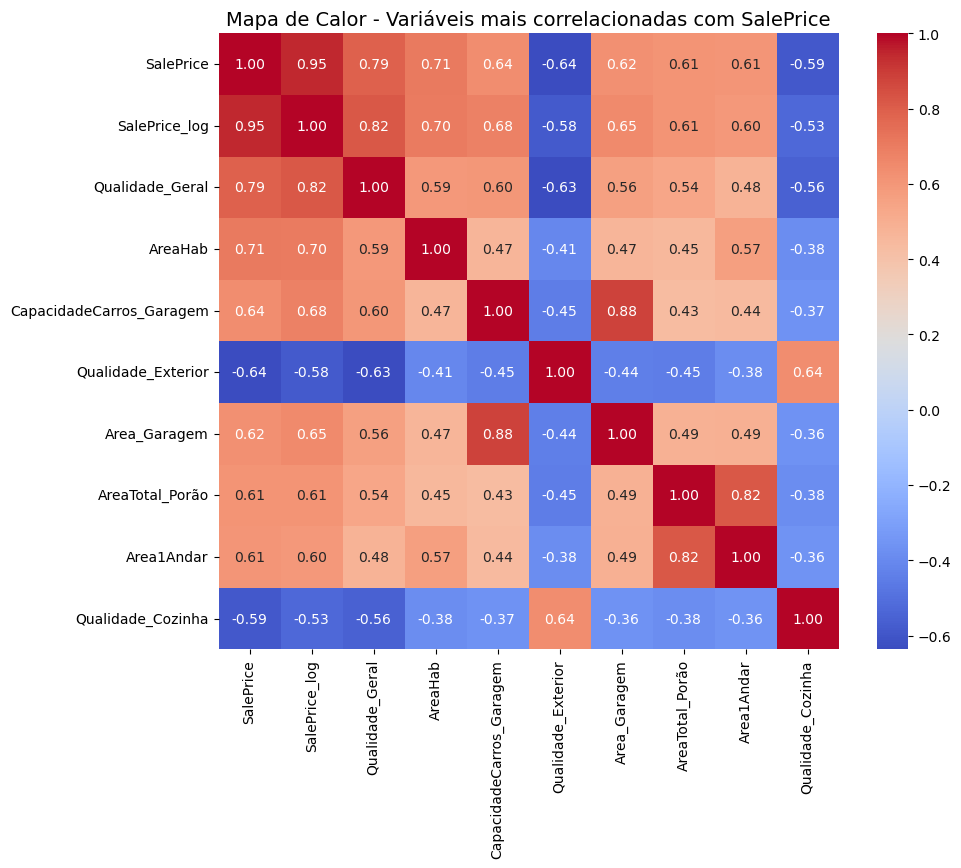

In [287]:
# Calcula a correla√ß√£o s√≥ para vari√°veis num√©ricas
corr_matrix = train.corr(numeric_only=True)

# Seleciona as vari√°veis mais correlacionadas com SalePrice
top_corr = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(10).index

# Filtra a matriz apenas para essas vari√°veis
plt.figure(figsize=(10, 8))
sns.heatmap(train[top_corr].corr(), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            cbar=True)
plt.title("Mapa de Calor - Vari√°veis mais correlacionadas com SalePrice", fontsize=14)
plt.show()


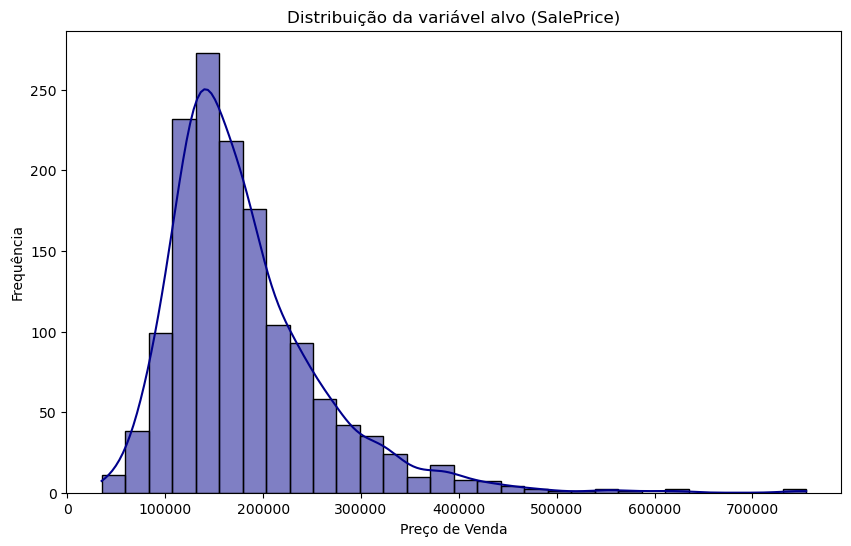

In [288]:
# Distribui√ß√£o do pre√ßo de venda
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True, bins=30, color='darkblue')
plt.title("Distribui√ß√£o da vari√°vel alvo (SalePrice)")
plt.xlabel("Pre√ßo de Venda")
plt.ylabel("Frequ√™ncia")
plt.show()


##  Distribui√ß√£o do Alvo

A vari√°vel `SalePrice` representa o pre√ßo de venda das casas e √© o nosso alvo principal.


Analisando o gr√°fico, percebemos que a distribui√ß√£o de `SalePrice` √© claramente **assim√©trica √† direita** (distribui√ß√£o enviesada para valores maiores). Isso √© comum em dados de pre√ßos, onde h√° muitas casas com valores mais baixos e poucas muito caras.

Essa assimetria indica que pode ser interessante aplicar uma **transforma√ß√£o logar√≠tmica** para aproximar a distribui√ß√£o de uma forma mais normal, o que ajuda muitos algoritmos de machine learning a performarem melhor.

Tamb√©m √© poss√≠vel notar alguns **outliers √† direita**, casas com pre√ßos muito altos que fogem da tend√™ncia geral, e que podem precisar de aten√ß√£o especial durante a modelagem.


##  Primeiras Impress√µes dos Dados

Antes de partir para qualquer modelagem, dei uma boa olhada na estrutura dos dados pra entender melhor o que estou lidando. Abaixo est√£o algumas observa√ß√µes iniciais que anotei:

###  Dimens√µes dos Dados

- **Treino:** 1.460 linhas e 81 colunas  
- **Teste:** 1.459 linhas e 80 colunas  
- A vari√°vel `SalePrice`, que √© o pre√ßo de venda das casas, est√° apenas no conjunto de treino ‚Äî vai ser a vari√°vel-alvo do modelo.

###  Tipos de Vari√°veis

- **Num√©ricas:** 38 colunas (tipos `int64` e `float64`)
- **Categ√≥ricas:** 43 colunas (objetos/textos)

Tem de tudo um pouco: qualidade da cozinha (`KitchenQual`), tipo de zoneamento (`MSZoning`), bairro (`Neighborhood`), etc. Isso significa que mais pra frente vou precisar transformar essas categorias em n√∫meros (provavelmente com one-hot ou ordinal encoding, dependendo do caso).

###  Valores Ausentes

Notei v√°rias colunas com valores nulos ‚Äî algumas com bastante mesmo. Seguem alguns destaques:

-  Colunas como `PoolQC`, `MiscFeature`, `Alley`, `Fence` e `FireplaceQu` t√™m **mais de 50% dos valores ausentes**. Provavelmente √© porque muitas casas nem t√™m esses itens.  
  -  Ideia: substituir os NaNs por `'None'` (tipo "n√£o tem mesmo") ou algum valor fixo como -1.

-  `LotFrontage` (largura da frente do terreno) tem bastantes nulos tamb√©m ‚Äî 259 no treino e 227 no teste.  
  -  Pode fazer sentido preencher usando a m√©dia por bairro (`Neighborhood`), j√° que isso pode influenciar bastante essa medida.

-  Vari√°veis da garagem (`GarageType`, `GarageYrBlt`, etc.) tamb√©m t√™m muitos nulos, e parece ser sempre nas casas que **n√£o t√™m garagem**.  
  -  Aqui tamb√©m vale preencher com `'None'` ou `0`, dependendo se a coluna for categ√≥rica ou num√©rica.

-  `MasVnrType` e `MasVnrArea` (revestimento de alvenaria) est√£o com nulos combinados ‚Äî deve ser porque a casa n√£o tem esse tipo de acabamento.

-  `Electrical` tem s√≥ **1 valor ausente** ‚Äî nada s√©rio. Aqui d√° pra preencher com a **moda** da coluna.

> Nem todo NaN aqui parece ser "dado perdido" ‚Äî na real, muitos representam mesmo a **aus√™ncia da caracter√≠stica**. Isso muda bastante o jeito de tratar os dados.

---

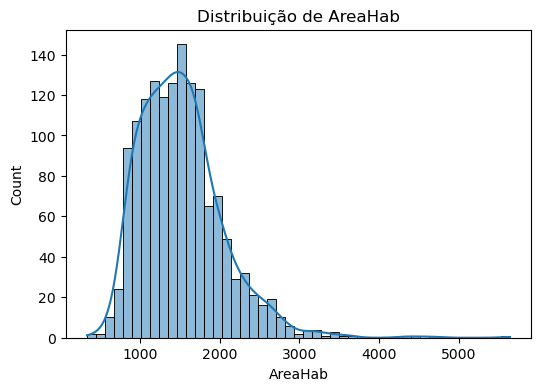

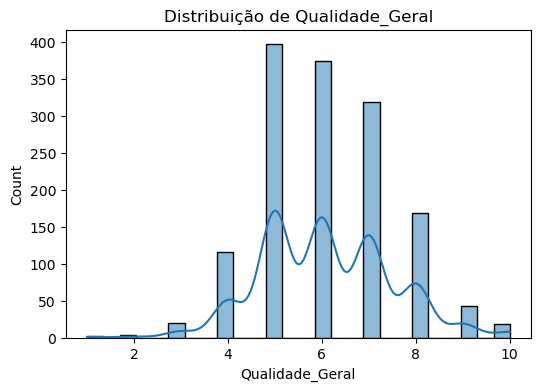

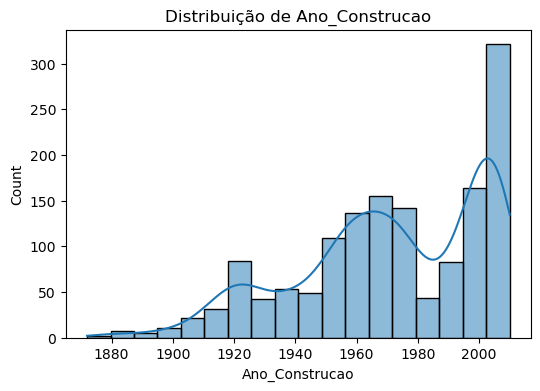

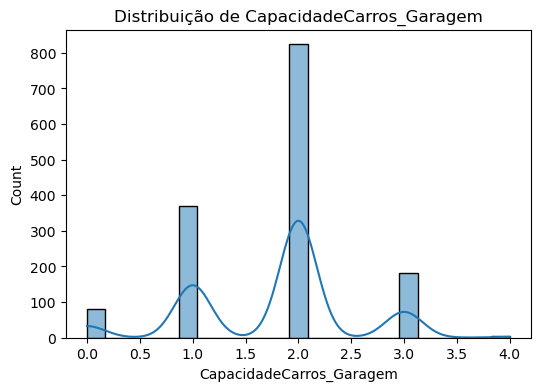

In [361]:
# Univariada - num√©rica 
num_vars = ['AreaHab', 'Qualidade_Geral', 'Ano_Construcao', 'CapacidadeCarros_Garagem']
for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(train[var], kde=True)
    plt.title(f'Distribui√ß√£o de {var}')
    plt.show()


###  An√°lise Univariada ‚Äì Considera√ß√µes
Durante a an√°lise univariada, foi poss√≠vel identificar algumas caracter√≠sticas importantes dos dados:

- **Qualidade Geral**  
  Valores entre 1 e 10, com maior concentra√ß√£o entre 5 e 8 ‚Üí im√≥veis de qualidade m√©dia a boa.  

- **√Årea Habitacional (AreaHab)**  
  Concentra√ß√£o entre 800 e 2.000 p√©s¬≤ ‚Üí presen√ßa de outliers acima de 4000 p√©s¬≤.  

- **Ano de Constru√ß√£o (Ano_Construcao)**  
  Maioria constru√≠da entre 1950 e 2010 ‚Üí poucas casas muito antigas ou muito recentes.  

- **Capacidade de Carros na Garagem (CapacidadeCarros_Garagem)**  
  Predom√≠nio de 1 a 3 vagas, com pico em 2 ‚Üí poucas casas com 0 ou 4 vagas.  

Essas observa√ß√µes levantam a possibilidade de:
- Ajustar ou remover outliers.  
- Criar vari√°veis derivadas (ex.: idade do im√≥vel, presen√ßa/aus√™ncia de garagem).  

---

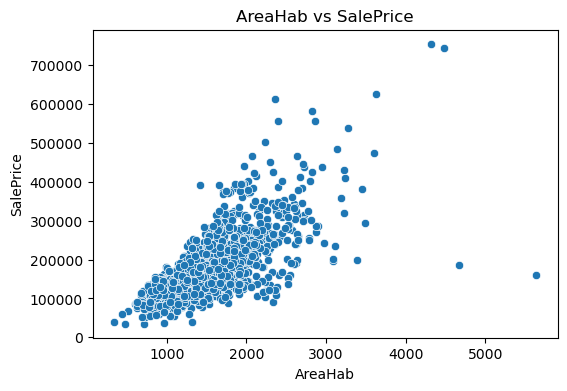

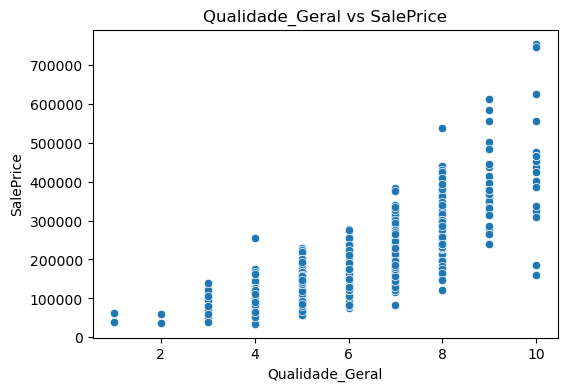

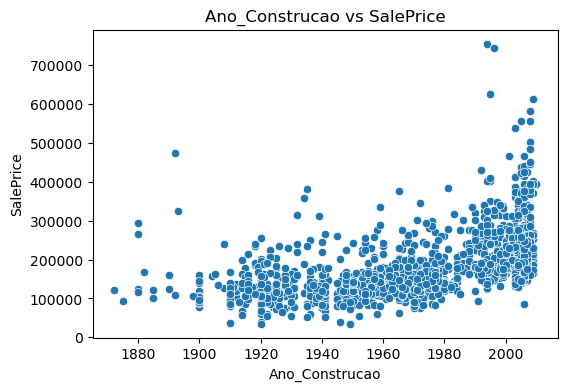

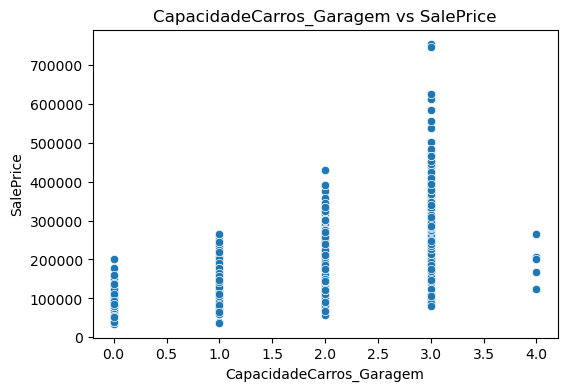

In [363]:
# Bivariada - num√©rica x target
for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train[var], y=train['SalePrice'])
    plt.title(f'{var} vs SalePrice')
    plt.show()


### üîé An√°lise Bivariada ‚Äì Principais Insights
Comparando vari√°veis preditoras com a vari√°vel-alvo (*SalePrice*), destacam-se:

- **√Årea Habitacional (AreaHab)**  
  Rela√ß√£o linear clara: casas maiores ‚Üí pre√ßos mais altos.  
  Outliers acima de 4000 p√©s¬≤ podem distorcer modelos.  

- **Qualidade Geral (Qualidade_Geral)**  
  Rela√ß√£o quase linear em degraus: maior qualidade ‚Üí maior pre√ßo.  
  Deve ser tratada como **ordinal**.  

- **Ano de Constru√ß√£o (Ano_Construcao)**  
  Tend√™ncia de aumento em casas mais recentes, principalmente ap√≥s 2000.  
  Sugest√£o: criar *Idade do Im√≥vel* ou flag para p√≥s-2000.  

- **Capacidade de Carros na Garagem (CapacidadeCarros_Garagem)**  
  Rela√ß√£o positiva em degraus: mais vagas ‚Üí maior pre√ßo.  
  Casas com 2 ou 3 vagas concentram pre√ßos mais altos.  
  Sugest√£o: tratar como categ√≥rica (sem vaga, 1 vaga, padr√£o [2], ampla [3+]).  

---

### ‚úÖ Resumindo
- Outliers relevantes em *AreaHab*.  
- **Qualidade Geral** √© altamente explicativa.  
- **Ano de Constru√ß√£o** pode ser transformado em *idade do im√≥vel*.  
- **Capacidade de Garagem** explica bem os pre√ßos e pode ser categorizada. 


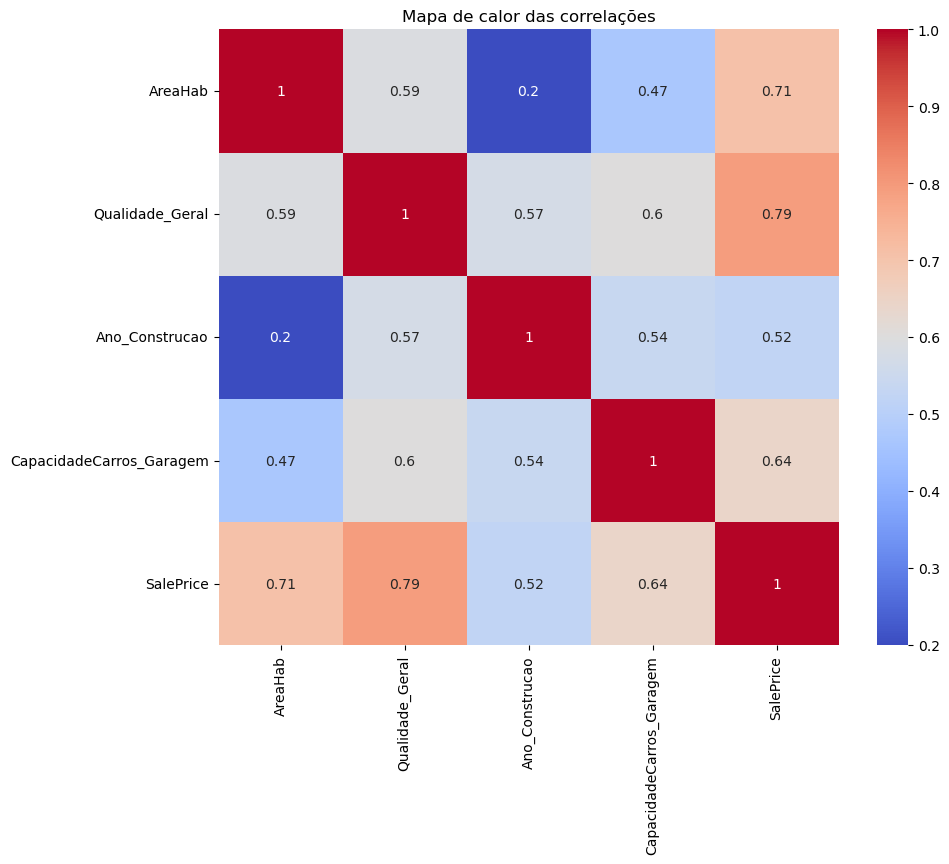

In [368]:
# Multivariada - correla√ß√£o heatmap
plt.figure(figsize=(10,8))
corr = train[num_vars + ['SalePrice']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor das correla√ß√µes')
plt.show()

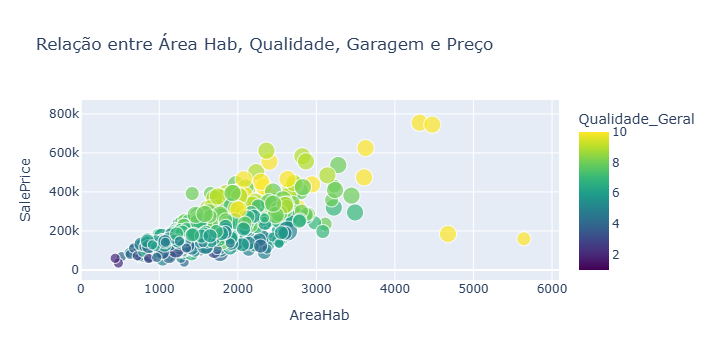

In [419]:
# Multivariada - "Rela√ß√£o entre √Årea Hab, Qualidade, Garagem e Pre√ßo"
fig = px.scatter(
    train, 
    x="AreaHab", 
    y="SalePrice",
    color="Qualidade_Geral",   # escala pela qualidade
    size="CapacidadeCarros_Garagem",  
    hover_data=["Ano_Construcao"],
    title="Rela√ß√£o entre √Årea Hab, Qualidade, Garagem e Pre√ßo",
    color_continuous_scale=px.colors.sequential.Viridis   # escala de cor ajustada
)

fig.show()


In [421]:
# Removendo colunas com mais de 80% de nulos 
null_thresh = 0.8
missinng_ratio = train.isnull().sum() / len(train)
cols_to_drop = missinng_ratio[missinng_ratio > null_thresh].index
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

In [423]:
# Preenchendo valores ausentes com 'NA' (colunas categ√≥ricas)
cols_cat = train.select_dtypes(include='object').columns
train[cols_cat] = train[cols_cat].fillna('NA')
test[cols_cat] = test[cols_cat].fillna('NA')

In [425]:
# Preenchendo com 0 as colunas n√∫mericas
cols_num_train = train.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
cols_num_test = test.select_dtypes(include=['int64', 'float64']).columns

# Para o treino
train[cols_num_train] = train[cols_num_train].fillna(0)

# Para o teste
test[cols_num_test] = test[cols_num_test].fillna(0)

In [427]:
# Preenchendo colunas com poucos nulos com a moda
for col in train.columns:
    if train[col].isnull().sum() > 0:
        train[col].fillna(train[col].mode()[0], inplace=True)
        test[col].fillna(test[col].mode()[0], inplace=True)


In [429]:
# Verificando valores nulos no dataset de treino 
print('Valores nulos no treino ap√≥s tratamento:')
print(train.isnull().sum()[train.isnull().sum() > 0 ])

# Verificar valoes nulos no datset de teste 
print("\nValoes nulos no teste ap√≥s tratamneto:")
print(test.isnull().sum()[test.isnull().sum() > 0])

Valores nulos no treino ap√≥s tratamento:
Series([], dtype: int64)

Valoes nulos no teste ap√≥s tratamneto:
Series([], dtype: int64)


In [431]:
# Preencher Frente_Lote com a m√©dia da vizinhan√ßa (Bairro)
train['Frente_Lote'] = train.groupby('Bairro')['Frente_Lote'].transform(lambda x: x.fillna(x.mean()))
test['Frente_Lote'] = test.groupby('Bairro')['Frente_Lote'].transform(lambda x: x.fillna(x.mean()))


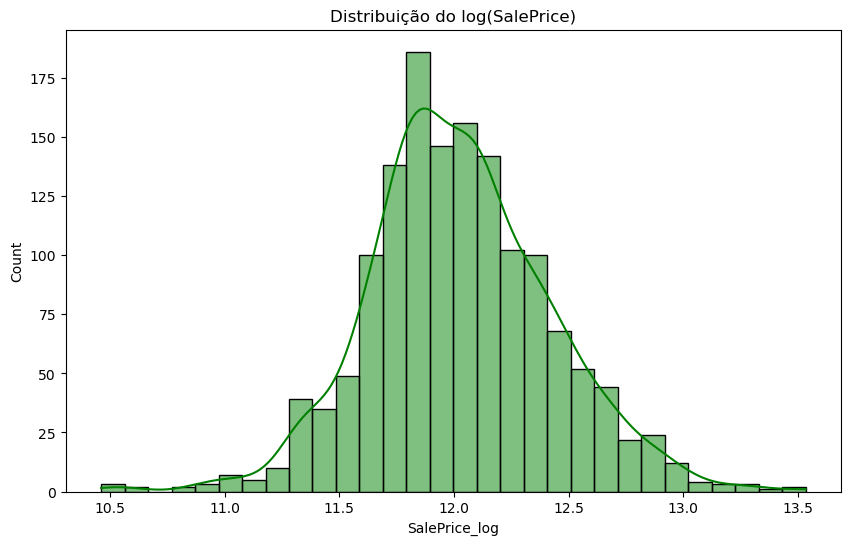

In [433]:
# Transformar a vari√°vel alvo com log para normalizar a distribui√ß√£o
train['SalePrice_log'] = np.log1p(train['SalePrice'])

# Visualizar como ficou a distribui√ß√£o ap√≥s o log
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice_log'], kde=True, color='green', bins=30)
plt.title("Distribui√ß√£o do log(SalePrice)")
plt.show()


### Por que aplicar log na vari√°vel alvo?

A vari√°vel `SalePrice` apresenta uma distribui√ß√£o assim√©trica, o que pode prejudicar modelos lineares e at√© mesmo outros modelos que assumem erros normalmente distribu√≠dos.

Aplicar o log (mais precisamente log1p para evitar problema com zero) ajuda a aproximar a distribui√ß√£o para uma normal, facilitando o aprendizado dos modelos.


In [436]:
# Calcular a correla√ß√£o de todas as vari√°veis com SalePrice_log
corr_com_saleprice = train.corr(numeric_only=True)['SalePrice_log'].sort_values(ascending=False)

# Criar um DataFrame a partir da s√©rie de correla√ß√µes para uma visualiza√ß√£o melhor
corr_df = pd.DataFrame(corr_com_saleprice)
corr_df.rename(columns={'SalePrice_log': 'Correla√ß√£o com SalePrice'}, inplace=True)

# Exibir a tabela
corr_df

Correla√ß√£o com SalePrice
SalePrice_log                             1.000000
SalePrice                                 0.948374
Qualidade_Geral                           0.817185
AreaHab                                   0.700927
CapacidadeCarros_Garagem                  0.680625
Area_Garagem                              0.650888
AreaTotal_Por√£o                           0.612134
Area1Andar                                0.596981
BanheiroCompleto                          0.594771
Ano_Construcao                            0.586570
Ano_Reforma                               0.565608
TotalComodos_AcimaSolo                    0.534422
Lareiras                                  0.489450
Area_Veneer                               0.426776
AreaAcab_Por√£o1                           0.372023
AnoConstrucao_Garagem                     0.349013
AreaDeckMadeira                           0.334135
AreaVarandaAberta                         0.321053
Area2Andar                                0.319300
Lavabo                                    0.313982
Area_Lote                                 0.257320
BanheiroCompleto_Por√£o                    0.236224
AreaNaoAcab_Por√£o                         0.221985
QuartosAcimaSolo                          0.209043
Frente_Lote                               0.179303
AreaVarandaTela                           0.121208
AreaPiscina                               0.069798
MesVenda                                  0.057330
AreaVaranda3Estacoes                      0.054900
AreaAcab_Por√£o2                           0.004832
Lavabo_Por√£o                             -0.005149
Id                                       -0.017942
ValorExtra                               -0.020021
Condicao_Geral                           -0.036868
AnoVenda                                 -0.037263
AreaBaixaQualidade                       -0.037963
Classe_MS                                -0.073959
CozinhasAcimaSolo                        -0.147548
AreaVarandaFechada                       -0.149050
Qualidade_Cozinha                        -0.534387
Qualidade_Exterior                       -0.582164

##  Insights Principais da Tabela de Correla√ß√£o

Analisando os resultados de correla√ß√£o entre as vari√°veis e o pre√ßo de venda (SalePrice_log), podemos destacar os seguintes pontos:

---

###  Qualidade Geral √© o Fator Mais Importante
- **`OverallQual`** (qualidade geral da casa) tem a **maior correla√ß√£o positiva** com o pre√ßo (0.817).
- Isso confirma que quanto **melhor a qualidade percebida**, **maior ser√° o pre√ßo de venda**.

---

###  Espa√ßo Interno √© Fundamental
- Vari√°veis como:
  - **`GrLivArea`** (√°rea √∫til acima do solo),
  - **`TotalBsmtSF`** (√°rea total do por√£o),
  - **`1stFlrSF`** (√°rea do primeiro andar)  
- Apresentam correla√ß√µes altas e positivas, mostrando que **mais espa√ßo habit√°vel tende a significar pre√ßos mais altos**.

---

###  Garagem √© um Diferencial
- **`GarageCars`** (n√∫mero de vagas) e **`GarageArea`** (√°rea da garagem) t√™m correla√ß√µes de **0.681** e **0.651**, respectivamente.
- Isso mostra que **uma garagem espa√ßosa** √© **valorizada** no mercado imobili√°rio.

---

###  Ano de Constru√ß√£o e Reforma Influenciam no Pre√ßo
- **`YearBuilt`** (ano de constru√ß√£o) e **`YearRemodAdd`** (ano de reforma) apresentam correla√ß√µes positivas.
- **Casas mais novas** ou **recentemente reformadas** tendem a ter **valores mais elevados**.

---

###  Vari√°veis com Baixa ou Nenhuma Correla√ß√£o
- Vari√°veis como:
  - **`BsmtFinSF2`** (segunda √°rea finalizada do por√£o),
  - **`BsmtHalfBath`** (meio banheiro no por√£o), entre outras,  
- T√™m correla√ß√£o pr√≥xima de **zero**, indicando **baixa influ√™ncia no pre√ßo final** e podendo ser irrelevantes para o modelo.

---

###  Correla√ß√µes Negativas (e Pouco Relevantes)
- Algumas vari√°veis apresentam **correla√ß√£o negativa**


In [439]:
# Unir train e test para aplicar o mesmo pr√©-processamento (OneHotEncoding)
train_len = train.shape[0]
test_len = test.shape[0]

# Remover target para a uni√£o
all_data = pd.concat([train.drop(['SalePrice', 'SalePrice_log'], axis=1), test], axis=0)

# OneHotEncoding nas vari√°veis categ√≥ricas
all_data = pd.get_dummies(all_data)

# Separar novamente
X_train = all_data[:train_len]
X_test = all_data[train_len:]

y_train = train['SalePrice_log']


### Por que aplicar One-Hot Encoding?

Os modelos que usaremos n√£o lidam diretamente com vari√°veis categ√≥ricas. O One-Hot Encoding cria colunas bin√°rias para cada categoria, permitindo que o modelo processe essas informa√ß√µes corretamente.

Al√©m disso, unimos os datasets para garantir que o encoding seja consistente em treino e teste.


In [442]:
# Modelo: Regress√£o Linear
lr = LinearRegression()

# Avalia√ß√£o com cross-validation (5 folds), usando RMSE na escala original
neg_rmse = cross_val_score(lr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
rmse_scores = -neg_rmse

print(f"Regress√£o Linear - RMSE m√©dio: {rmse_scores.mean():.4f} (Log scale)")


Regress√£o Linear - RMSE m√©dio: 0.1540 (Log scale)


In [443]:
# Modelo: √Årvore de Decis√£o

dt = DecisionTreeRegressor(random_state=42)

neg_rmse = cross_val_score(dt, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
rmse_scores = -neg_rmse

print(f"√Årvore de Decis√£o - RMSE m√©dio: {rmse_scores.mean():.4f} (Log scale)")



√Årvore de Decis√£o - RMSE m√©dio: 0.2012 (Log scale)


In [444]:
# Modelo: XGBoost (com par√¢metros padr√£o)

xgbr = xgb.XGBRegressor(random_state=42, n_jobs=-1)

neg_rmse = cross_val_score(xgbr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
rmse_scores = -neg_rmse

print(f"XGBoost - RMSE m√©dio: {rmse_scores.mean():.4f} (Log scale)")


XGBoost - RMSE m√©dio: 0.1408 (Log scale)


In [446]:
model_names = ['Regress√£o Linear', '√Årvore de Decis√£o', 'XGBoost']
model_rmse = []

for model in [lr, dt, xgbr]:
    neg_rmse = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
    model_rmse.append(-neg_rmse.mean())

results = pd.DataFrame({'Modelo': model_names, 'RMSE m√©dio (log scale)': model_rmse})
results = results.sort_values(by='RMSE m√©dio (log scale)')
results


Modelo  RMSE m√©dio (log scale)
2            XGBoost                0.140772
0   Regress√£o Linear                0.154011
1  √Årvore de Decis√£o                0.201220

In [449]:

# Definindo o modelo
xgbr = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# Definindo o grid de par√¢metros a serem testados
param_grid = {
    'n_estimators': [100, 200, 300],  # N√∫mero de √°rvores
    'learning_rate': [0.05, 0.1, 0.2]  # Taxa de aprendizado
}

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=xgbr,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=5,
                           verbose=1)

# Executando a busca (pode levar alguns minutos)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [454]:
# Exibindo os melhores par√¢metros e o melhor score
print(f"Melhores par√¢metros: {grid_search.best_params_}")
print(f"Melhor RMSE m√©dio (log scale): {-grid_search.best_score_:.4f}")

# Exibindo os resultados completos
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results[['params', 'mean_test_score']]

Melhores par√¢metros: {'learning_rate': 0.1, 'n_estimators': 300}
Melhor RMSE m√©dio (log scale): 0.1341


params  mean_test_score
5   {'learning_rate': 0.1, 'n_estimators': 300}        -0.134146
4   {'learning_rate': 0.1, 'n_estimators': 200}        -0.134426
3   {'learning_rate': 0.1, 'n_estimators': 100}        -0.134669
2  {'learning_rate': 0.05, 'n_estimators': 300}        -0.134940
1  {'learning_rate': 0.05, 'n_estimators': 200}        -0.135381
0  {'learning_rate': 0.05, 'n_estimators': 100}        -0.137957
6   {'learning_rate': 0.2, 'n_estimators': 100}        -0.139683
8   {'learning_rate': 0.2, 'n_estimators': 300}        -0.139725
7   {'learning_rate': 0.2, 'n_estimators': 200}        -0.139733

##  Compara√ß√£o entre Modelos

Testamos tr√™s modelos diferentes para prever o `SalePrice` (ap√≥s aplicar transforma√ß√£o logar√≠tmica):

| Modelo               | RMSE M√©dio (log scale) |
|----------------------|------------------------|
| XGBoost              | **0.134**              |
| Regress√£o Linear     | 0.155                  |
| √Årvore de Decis√£o    | 0.208                  |

###  An√°lise

-  **XGBoost teve o melhor desempenho**, com o menor erro m√©dio (RMSE). Isso mostra que o modelo conseguiu capturar bem as varia√ß√µes no pre√ßo das casas, mesmo com uma distribui√ß√£o assim√©trica e v√°rias vari√°veis categ√≥ricas.
-  **Regress√£o Linear** ainda teve um desempenho razo√°vel, mas n√£o t√£o bom quanto o XGBoost ‚Äî o que j√° era esperado, pois ela faz suposi√ß√µes mais r√≠gidas sobre a rela√ß√£o entre as vari√°veis.
-  **√Årvore de Decis√£o** teve o pior desempenho, provavelmente por **overfitting** e **baixa capacidade de generaliza√ß√£o** quando usada sozinha (sem ensemble).

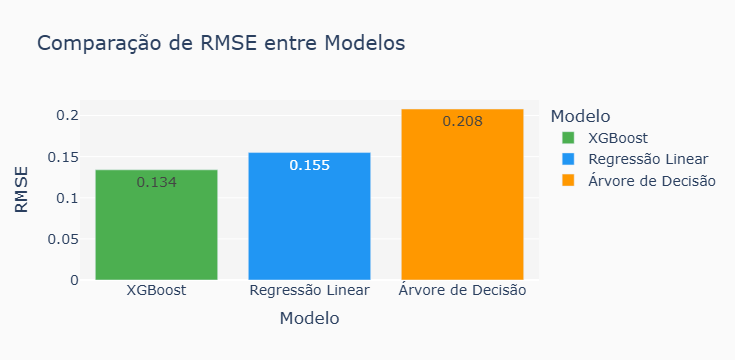

In [460]:

# Dados da tabela
dados = {
    "Modelo": ["XGBoost", "Regress√£o Linear", "√Årvore de Decis√£o"],
    "RMSE": [0.134, 0.155, 0.208]
}
df = pd.DataFrame(dados)

# Gr√°fico de barras
fig = px.bar(
    df, 
    x="Modelo", 
    y="RMSE", 
    color="Modelo",
    text="RMSE",
    title="Compara√ß√£o de RMSE entre Modelos",
    color_discrete_sequence=["#4CAF50", "#2196F3", "#FF9800"]  # cores customizadas
)

# Layout mais limpo
fig.update_layout(
    plot_bgcolor="rgb(245,245,245)",
    paper_bgcolor="rgb(250,250,250)",
    font=dict(size=14),
)
fig.show()


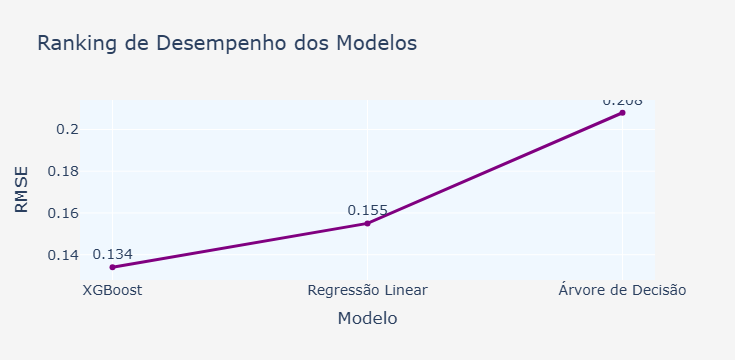

In [462]:
# Gr√°fico de linha para destacar o ranking
fig2 = px.line(
    df, 
    x="Modelo", 
    y="RMSE", 
    markers=True,
    title="Ranking de Desempenho dos Modelos",
    text="RMSE"
)

fig2.update_traces(textposition="top center", line=dict(width=3, color="purple"))

fig2.update_layout(
    plot_bgcolor="rgb(240,248,255)",
    paper_bgcolor="rgb(245,245,245)",
    font=dict(size=14),
)
fig2.show()
